In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from pathlib import Path

In [2]:
# path = "./output/20220819/C0/folder_grainstats.csv"
# df = pd.read_csv(path)
# df['aspect_ratio'].head()

all_data_df = {}

base_dir = Path('./sorted_data_and_processed/')
# Find all paths of folder_grainstats.csv
all_stats_files = base_dir.glob('**/folder_grainstats.csv')

# For each path, determine which sample type
for path in all_stats_files:
    sample_type = str(path).split('/')[1]

    if sample_type not in all_data_df.keys():
        print(f'new key: {sample_type}')
        df = pd.DataFrame()
        all_data_df[sample_type] = df

    new_df = pd.read_csv(path).dropna()
    added_length = len(new_df)
    all_data_df[sample_type] = pd.concat([all_data_df[sample_type], new_df])
    print(f" {sample_type} : {path} : {sample_type} : added len:{added_length} : total len: {len(all_data_df[sample_type])}")

for sample_type in all_data_df.keys():
    print(f"{sample_type} : len: {len(all_data_df[sample_type])}")



new key: A4
 A4 : sorted_data_and_processed/A4/processed/folder_grainstats.csv : A4 : added len:5 : total len: 5
new key: A3
 A3 : sorted_data_and_processed/A3/A3_large/processed/folder_grainstats.csv : A3 : added len:165 : total len: 165
 A3 : sorted_data_and_processed/A3/A3_small/processed/folder_grainstats.csv : A3 : added len:46 : total len: 211
new key: B2
 B2 : sorted_data_and_processed/B2/processed/folder_grainstats.csv : B2 : added len:25 : total len: 25
new key: B3
 B3 : sorted_data_and_processed/B3/B3_S/processed/folder_grainstats.csv : B3 : added len:26 : total len: 26
 B3 : sorted_data_and_processed/B3/B3_L/processed/folder_grainstats.csv : B3 : added len:181 : total len: 207
new key: B4
 B4 : sorted_data_and_processed/B4/processed/folder_grainstats.csv : B4 : added len:21 : total len: 21
new key: A2
 A2 : sorted_data_and_processed/A2/processed/folder_grainstats.csv : A2 : added len:42 : total len: 42
new key: D1
 D1 : sorted_data_and_processed/D1/processed/folder_grainstat

In [3]:
print(all_data_df["A4"].keys())

Index(['Molecule Number', 'centre_x', 'centre_y', 'radius_min', 'radius_max',
       'radius_mean', 'radius_median', 'height_min', 'height_max',
       'height_median', 'height_mean', 'volume', 'area', 'area_cartesian_bbox',
       'smallest_bounding_width', 'smallest_bounding_length',
       'smallest_bounding_area', 'aspect_ratio', 'Contour Lengths', 'Circular',
       'End to End Distance', 'Image Name', 'Basename', 'threshold',
       'max_feret', 'min_feret'],
      dtype='object')


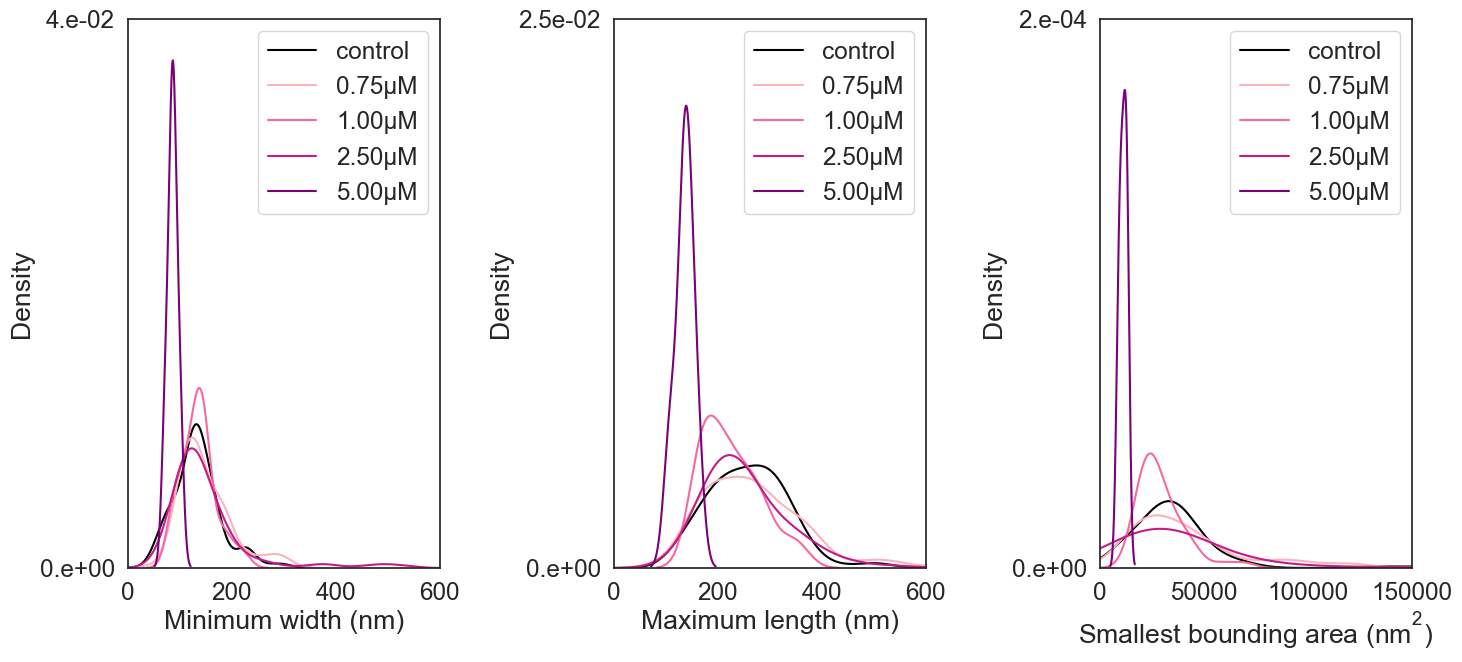

In [19]:
# from pprint import pprint

# Manual plotting

sns.set_theme(style="white", palette=None, font_scale=1.6)
def plot_single_sample(sample_type, stat_keys, plot_labels, sample_label=None, color=None):
    
    legend_label = sample_type if sample_label is None else sample_label

    df = all_data_df[sample_type]
    df['feret_ratio'] = df['max_feret'] / df['min_feret']
    
    for index, stat in enumerate(stat_keys):
        stat_df = df[df[stat] != np.inf]
        sample_size = len(stat_df.index)
        # sns.distplot(stat_df[stat], label=f'{legend_label} : count: {sample_size}', ax=ax[index], color=color, hist_kws=dict(alpha=0.2))
        # sns.distplot(stat_df[stat], label=f'{legend_label}', ax=ax[index], color=color, hist_kws=dict(alpha=0.2))     
        sns.kdeplot(stat_df[stat], label=f'{legend_label}', ax=ax[index], color=color)

        if stat == 'min_feret':
            # Both
            ax[index].set_xlim(0, 600)
            # N3TriplatinNC
            ax[index].set_ylim(0, 0.04)
            # TriplatinNC
            # ax[index].set_ylim(0, 0.025)

        elif stat == 'max_feret':
            # Both
            ax[index].set_xlim(0, 600)
            # N3TriplatinNC
            ax[index].set_ylim(0, 0.025)
            # TriplatinNC
            # ax[index].set_ylim(0, 0.015)

        elif stat == 'smallest_bounding_area':
            # Both
            ax[index].set_xlim(0, 150000)
            # N3TriplatinNC
            ax[index].set_ylim(0, 0.0002)
            # TriplatinNC
            # ax[index].set_ylim(0, 0.00012)


        # Get first and last y tick labels
        yticks = ax[index].get_yticklabels()
        # print(f'yticks: {yticks}')
        first_tick = yticks[0]._text
        last_tick = yticks[-1]._text
        # print(first_tick)
        # print(last_tick)
        ax[index].set_yticks([float(first_tick), float(last_tick)])
        ax[index].set_yticklabels([np.format_float_scientific(float(first_tick)), np.format_float_scientific(float(last_tick))])

        ax[index].legend()
        ax[index].set_xlabel(plot_labels[index])

# stat_keys = ['min_feret', 'max_feret', 'area', 'feret_ratio', 'smallest_bounding_area']
# stat_keys = ['min_feret', 'max_feret', 'smallest_bounding_area', 'volume']
# labels = ['min width', 'max length', 'footprint area', 'volume']
# stat_keys = ['smallest_bounding_area', 'volume']
# labels = ['footprint area', 'volume']
stat_keys = ['min_feret', 'max_feret', 'smallest_bounding_area']
plot_labels = ['Minimum width (nm)', 'Maximum length (nm)', 'Smallest bounding area (nm$^2$)']
fig, ax = plt.subplots(1, len(stat_keys), figsize=(15, 7))

# plot_single_sample(sample_type='A0', color='black', sample_label='control', stat_keys=stat_keys, plot_labels=plot_labels)
# plot_single_sample(sample_type='A1', color='cornflowerblue', sample_label='0.75μM', stat_keys=stat_keys, plot_labels=plot_labels)

# -- NtriplatinNC --
# plot_single_sample(sample_type='A0', color='black', sample_label='control', stat_keys=stat_keys, plot_labels=plot_labels)
# plot_single_sample(sample_type='B1', color='#fbb4b9', sample_label='1.00 μM',stat_keys=stat_keys, plot_labels=plot_labels)
# plot_single_sample(sample_type='B2', color='#f768a1', sample_label='2.50 μM', stat_keys=stat_keys, plot_labels=plot_labels)
# plot_single_sample(sample_type='B3', color='#c51b8a', sample_label='5.00 μM', stat_keys=stat_keys, plot_labels=plot_labels)
# plot_single_sample(sample_type='B4', color='#7a0177', sample_label='7.50 μM', stat_keys=stat_keys, plot_labels=plot_labels)

# -- N3triplatinNC --

plot_single_sample(sample_type='A0', color='black', sample_label='control', stat_keys=stat_keys, plot_labels=plot_labels)
plot_single_sample(sample_type='A1', color='#fbb4b9', sample_label='0.75μM', stat_keys=stat_keys, plot_labels=plot_labels)
plot_single_sample(sample_type='A2', color='#f768a1', sample_label='1.00μM', stat_keys=stat_keys, plot_labels=plot_labels)
plot_single_sample(sample_type='A3', color='#c51b8a', sample_label='2.50μM', stat_keys=stat_keys, plot_labels=plot_labels)
plot_single_sample(sample_type='A4', color='#7a0177', sample_label='5.00μM', stat_keys=stat_keys, plot_labels=plot_labels)

fig.tight_layout()



/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_50777/4222252898.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, ax=ax[index, 0], kde=True, color=colour, hist_kws=dict(alpha=alpha))
/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_50777/4222252898.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

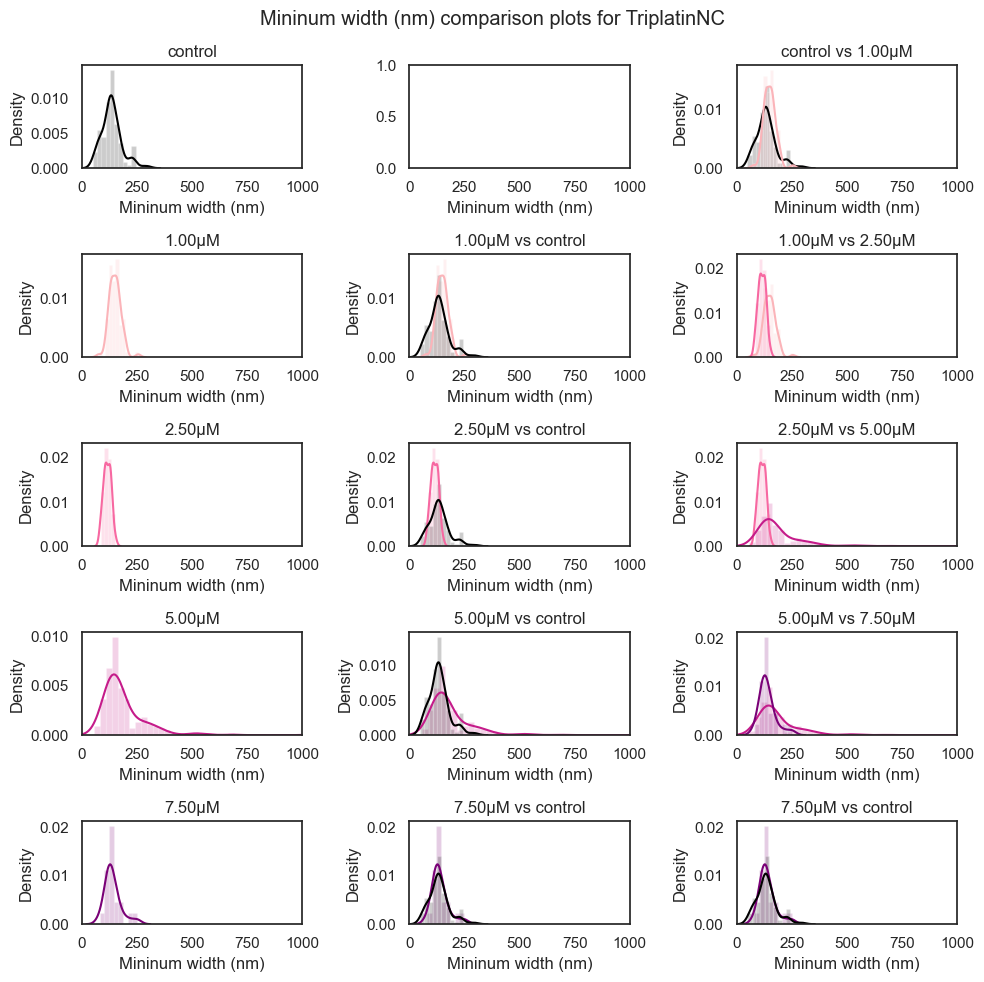

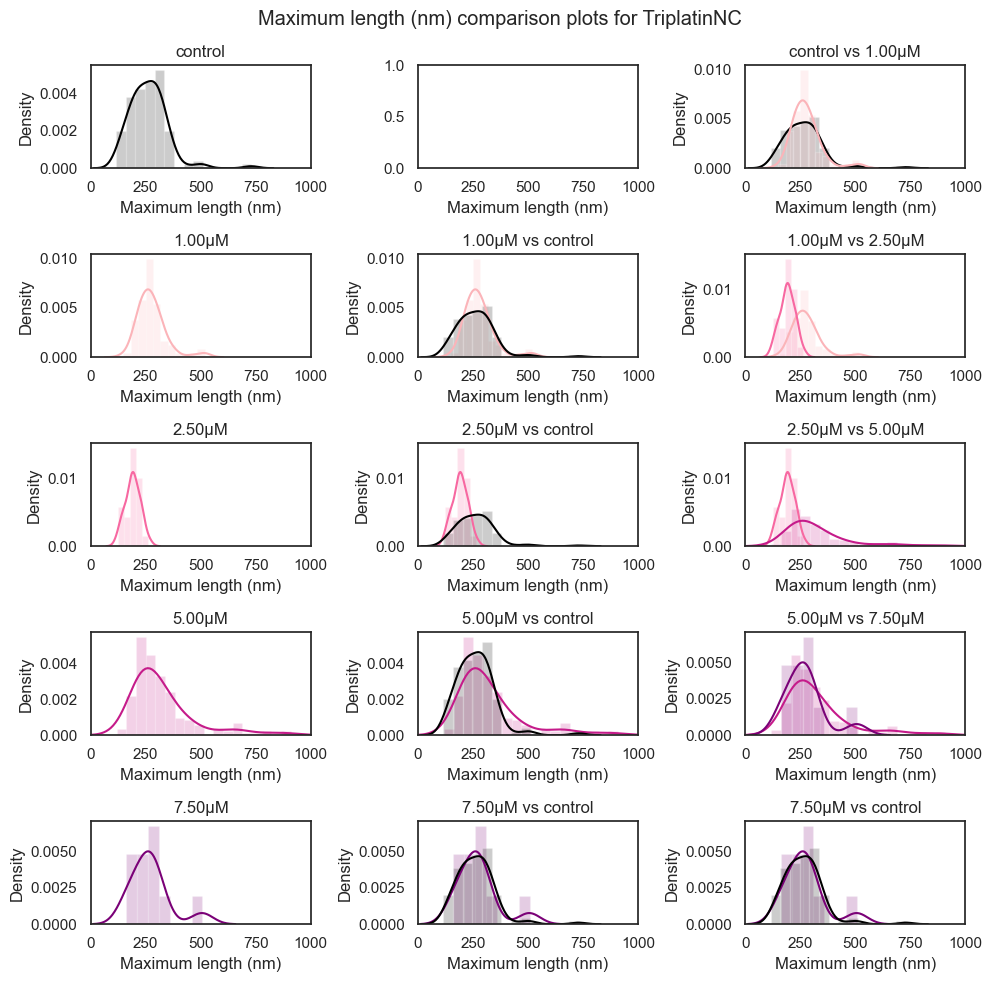

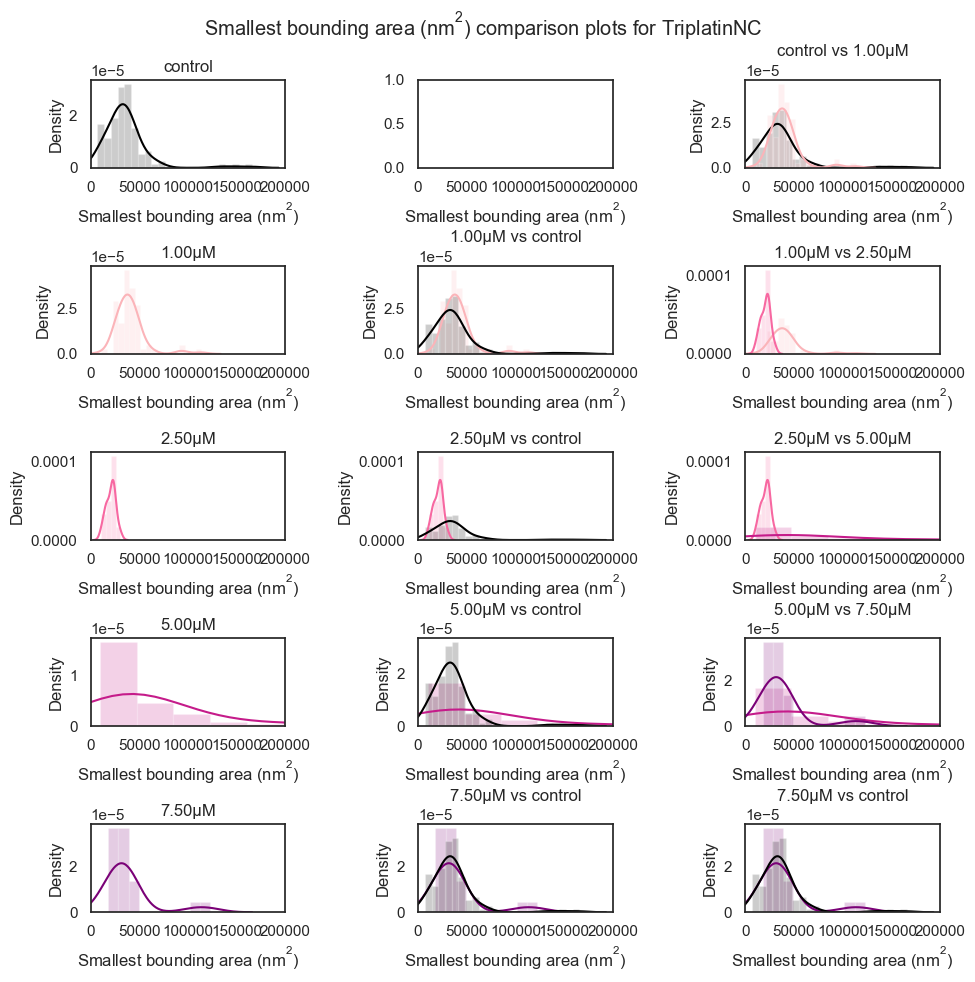

In [20]:
# Plot comparison grid

# samples = ['A0', 'A1', 'A2', 'A3', 'A4']
# sample_labels = ['control', '0.75μM', '1.00μM', '2.50μM', '5.00μM']
# batch = "$N_3$TriplatinNC"

samples = ['A0', 'B1', 'B2', 'B3', 'B4']
sample_labels = ['control', '1.00μM', '2.50μM', '5.00μM', '7.50μM']
batch = "TriplatinNC"

colours = ['black', '#fbb4b9', '#f768a1', '#c51b8a', '#7a0177']
stat_keys = ['min_feret', 'max_feret', 'smallest_bounding_area']
stat_labels = ['Mininum width (nm)', 'Maximum length (nm)', 'Smallest bounding area (nm$^2$)']

alpha = 0.2

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

sns.set_theme(style="white", palette=None, font_scale=1)
for stat_index, stat_key in enumerate(stat_keys):
    stat_label = stat_labels[stat_index]

    fig, ax = plt.subplots(len(samples), 3, figsize=(10, 10))
    fig.suptitle(f'{stat_label} comparison plots for {batch}')

    for index in range(ax.shape[0]):
        sample = samples[index]
        colour = colours[index]
        sample_label = sample_labels[index]
        df = all_data_df[sample]
        df = df[stat_key]
        if index == 0:
            df_first = df
            sample_label_first = sample_label
            colour_first = colour

        # Plot this sample's stat
        ax[index, 0].set_title(f'{sample_label}')
        sns.distplot(df, ax=ax[index, 0], kde=True, color=colour, hist_kws=dict(alpha=alpha))
        

        # Plot this sample's stat in comparison to the control
        if index > 0:
            ax[index, 1].set_title(f'{sample_label} vs {sample_label_first}')
            sns.distplot(df, ax=ax[index, 1], kde=True, color=colour, hist_kws=dict(alpha=alpha))
            sns.distplot(df_first, ax=ax[index, 1], kde=True, color=colour_first, hist_kws=dict(alpha=alpha))

        if index < ax.shape[0] - 1:
            sample_next = samples[index+1]
            colour_next = colours[index+1]
            sample_label_next = sample_labels[index+1]
            df_next = all_data_df[sample_next]
            df_next = df_next[stat_key]

            ax[index, 2].set_title(f'{sample_label} vs {sample_label_next}')
            sns.distplot(df, ax=ax[index, 2], kde=True, color=colour, hist_kws=dict(alpha=alpha))
            sns.distplot(df_next, ax=ax[index, 2], kde=True, color=colour_next, hist_kws=dict(alpha=alpha))
        else:
            ax[index, 2].set_title(f'{sample_label} vs {sample_label_first}')
            sns.distplot(df, ax=ax[index, 2], kde=True, color=colour, hist_kws=dict(alpha=alpha))
            sns.distplot(df_first, ax=ax[index, 2], kde=True, color=colour_first, hist_kws=dict(alpha=alpha))

        if stat_key == 'min_feret':
            xlim = 1000
            ax[index, 0].set_xlim(0, xlim)
            ax[index, 1].set_xlim(0, xlim)
            ax[index, 2].set_xlim(0, xlim)
        elif stat_key == 'max_feret':
            xlim = 1000
            ax[index, 0].set_xlim(0, xlim)
            ax[index, 1].set_xlim(0, xlim)
            ax[index, 2].set_xlim(0, xlim)
        elif stat_key == 'smallest_bounding_area':
            xlim = 200000
            ax[index, 0].set_xlim(0, xlim)
            ax[index, 1].set_xlim(0, xlim)
            ax[index, 2].set_xlim(0, xlim)

        ax[index, 0].set_xlabel(stat_label)
        ax[index, 1].set_xlabel(stat_label)
        ax[index, 2].set_xlabel(stat_label)

    fig.tight_layout()

In [12]:
# Plot kde 
# fig, ax = plt.subplots(figsize=(8, 8))
# for type, df in sample_type_data.items():
#     print(type)
#     df = df[df.max_feret != np.inf]
#     # df['aspect_ratio'].plot.kde(ax=ax, alpha=1, linewidth=1.0)
#     sns.kdeplot(df['max_feret'], alpha=0.5, linewidth=1.0, label=f"{type}")
# plt.legend()
# # plt.xscale('log')
# plt.show()


# for type, df in sample_type_data.items():
#     print(type)
#     fig, ax = plt.subplots(1, len(stat_keys), figsize=(12, 8))
#     for index, stat in enumerate(stat_keys):
#         df = df[df[stat] != np.inf]
#         sns.kdeplot(df[stat], alpha=0.5, linewidth=1.0, label=f"{stat}", ax=ax[index])
#         # ax[index].set_xscale('log')
#         ax[index].set_title(stat)

#     fig.suptitle(type)
#     plt.show()

print(sample_type_data.keys())

stat_keys =['min_feret', 'max_feret', 'area', 'feret_ratio']

sample_types = {
    'A' : ['A0', 'A1', 'A2', 'A3', 'A4'],
    'B' : ['B1', 'B2', 'B3', 'B4'],
    'C' : ['C0', 'C1', 'C2', 'C3', 'C4'],
    'D' : ['D1', 'D2', 'D3', 'D4'],
    'E' : ['E0', 'E1', 'E2', 'E3', 'E4'],
    'F' : ['F1', 'F2', 'F3', 'F4'],

    '339 minicircles' : ['339 minicircles'],
    'oda' : ['oda'],
    'pUC19' : ['pUC19'],

}

control_df = sample_type_data['C0']
print(f'C0 :')
print(control_df.head())
control_df['feret_ratio'] = control_df['max_feret'] / control_df['min_feret']


for t_i, sample_cat in enumerate(sample_types.keys()):
    fig, ax = plt.subplots(1, len(stat_keys), figsize=(20, 8))
    fig.suptitle(f'sample type: {sample_cat}', fontsize=20)
    print(sample_cat)
    for s_i, sample in enumerate(sample_types[sample_cat]):
        print(sample)

        # Get sample data from main df
        df = sample_type_data[sample]
        sample_size = len(df.index)

        # Create new column, feret ratio
        df['feret_ratio'] = df['max_feret'] / df['min_feret']

        # Iterate over the stats in the sample's df, plotting them
        for index, stat in enumerate(stat_keys):
            stat_df = df[df[stat] != np.inf]
            sns.kdeplot(stat_df[stat], alpha=0.5, linewidth=3.0, label=f"{sample} : count: {sample_size}", ax=ax[index])
            # ax[index].set_xscale('log')
            ax[index].legend()
            ax[index].set_title(stat)

    # Plot control samples
    for index, stat in enumerate(stat_keys):
        sample = 'C0'
        df = sample_type_data[sample]
        sample_size = len(df.index)
        # Create new column, feret ratio
        df['feret_ratio'] = df['max_feret'] / df['min_feret']
        stat_df = df[df[stat] != np.inf]
        sns.kdeplot(stat_df[stat], alpha=0.5, linewidth=3.0, label=f"{sample} : count: {sample_size}", ax=ax[index])
        ax[index].legend()
        ax[index].set_title(stat)
        

    plt.savefig(f'./graphs/KDE_{sample_cat}.png')
    plt.tight_layout()
    plt.show()



NameError: name 'sample_type_data' is not defined